In [ ]:
總空間計算：sizeof(Top_dict[k])+d(56+4w)+4784

sizeof(Sk_head[i])=56 bytes
sizeof(Sketch[i,j])=4 bytes
sizeof(hll)=4784 bytes

## kosarak

EOF
Top-1365,Sketch:64*400
Execution time:  12.224 seconds.
Precision:  0.871
Top_dict with 143384 bytes.
Sketch with 102528 bytes.
Sk_head with 16472 bytes.
hyperloglog with 4784 bytes.
Total size 267168 bytes, 
Find:892
Top_ARE: 0.0447
Top_AAE: 2.5908
Estimate time:  0.705 seconds.


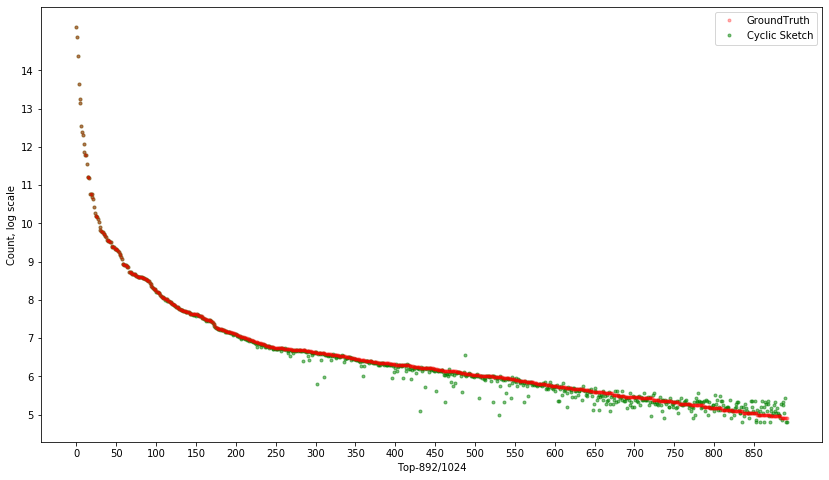

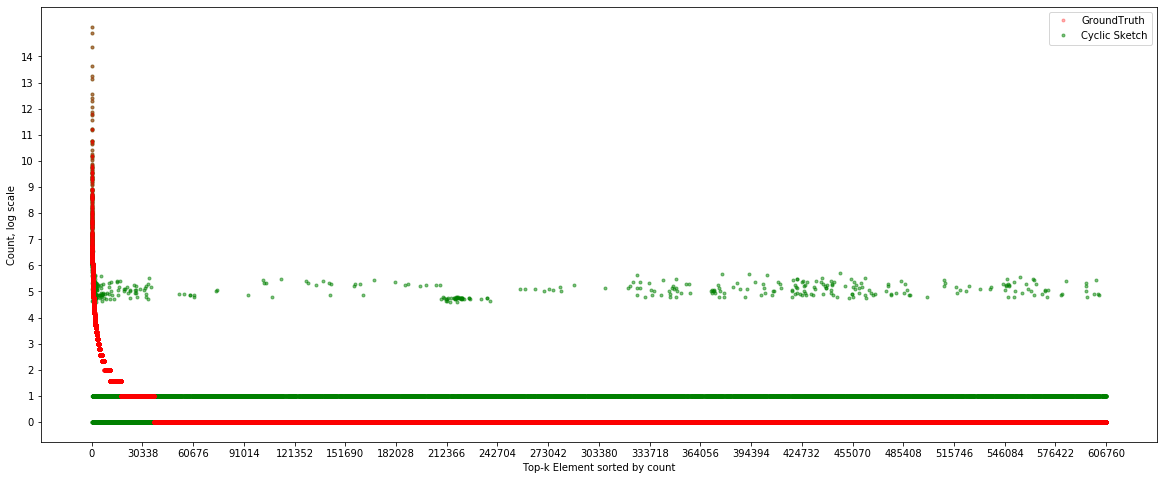

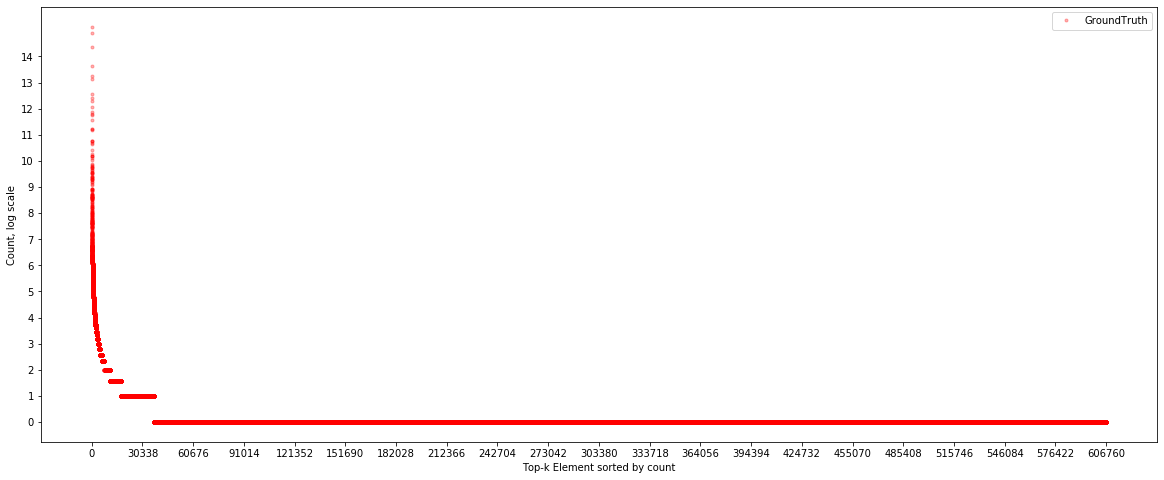

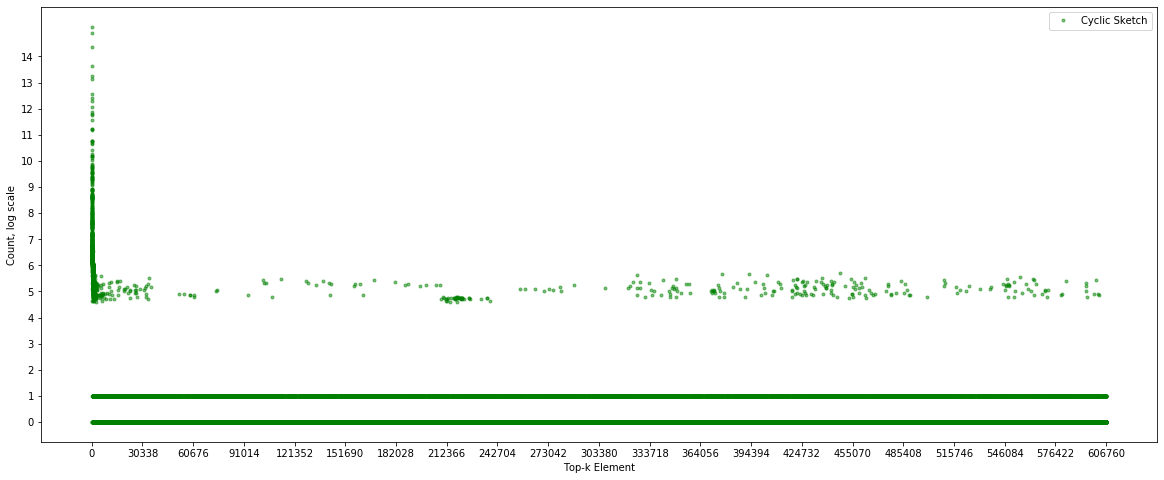

'\nprint(Sk_head)\nmin_ele = min(Top_dict, key=Top_dict.get)\n    # 找dict中的最小key元素\nprint(Top_dict[min_ele])\nfor i in range(len(Sk_head)):\n    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))\n'

In [86]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof


# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=400
d=64
size=1365
topk=1024
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} bytes, ".format(sk0+sk1+sk2+sk3))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))
'''

In [55]:
from pympler import asizeof

print(asizeof.asizeof(hll))
print(asizeof.asizeof(Top_dict))
print(asizeof.asizeof(Sk_head))
print(asizeof.asizeof(Sketch))
print(sys.getsizeof(hll.__slots__))
temp=asizeof.asizeof(hll)+asizeof.asizeof(Top_dict)+asizeof.asizeof(Sk_head)+asizeof.asizeof(Sketch)
print(temp)
#print(asizeof.asized(Top_dict, detail=1).format())
print(asizeof.asized(hll, detail=1).format())

4784
144120
16680
102528
80
268112
<hyperloglog.hll.HyperLogLog object at 0x000001218636DD80> size=4784 flat=72
    M size=4624 flat=4272
    p size=32 flat=32
    m size=32 flat=32
    alpha size=24 flat=24
    __class__ size=0 flat=0


In [85]:
print("Top_dict with {} bytes.".format(asizeof.asizeof(Top_dict)))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} bytes, ".format(asizeof.asizeof(Top_dict)+sk1+sk2+sk3))

Top_dict with 143344 bytes.
Sketch with 102528 bytes.
Sk_head with 16464 bytes.
hyperloglog with 4784 bytes.
Total size 267120 bytes, 


In [ ]:
# https://github.com/bosswissam/pysize/blob/master/pysize.py
import sys
import inspect

def get_size(obj, seen=None):
    """Recursively finds size of objects in bytes"""
    size = sys.getsizeof(obj)
    if seen is None:
        seen = set()
    obj_id = id(obj)
    if obj_id in seen:
        return 0
    # Important mark as seen *before* entering recursion to gracefully handle
    # self-referential objects
    seen.add(obj_id)
    if hasattr(obj, '__dict__'):
        for cls in obj.__class__.__mro__:
            if '__dict__' in cls.__dict__:
                d = cls.__dict__['__dict__']
                if inspect.isgetsetdescriptor(d) or inspect.ismemberdescriptor(d):
                    size += get_size(obj.__dict__, seen)
                break
    if isinstance(obj, dict):
        size += sum((get_size(v, seen) for v in obj.values()))
        size += sum((get_size(k, seen) for k in obj.keys()))
    elif hasattr(obj, '__iter__') and not isinstance(obj, (str, bytes, bytearray)):
        size += sum((get_size(i, seen) for i in obj))
        
    if hasattr(obj, '__slots__'): # can have __slots__ with __dict__
        size += sum(get_size(getattr(obj, s), seen) for s in obj.__slots__ if hasattr(obj, s))
        
    return size

print(get_size(Top_dict))
print(get_size(Sk_head))
print(get_size(Sketch))

## Caida

EOF
Top-1024,Sketch:256*76
Execution time:  28.793 seconds.
Precision:  0.901
Top_dict with 36968 bytes.
Sketch with 77936 bytes.
Sk_head with 27648 bytes.
Total size 142632 bytes, 
Find:923
Top_ARE: 0.0284
Top_AAE: 17.2568
Estimate time:  0.193 seconds.


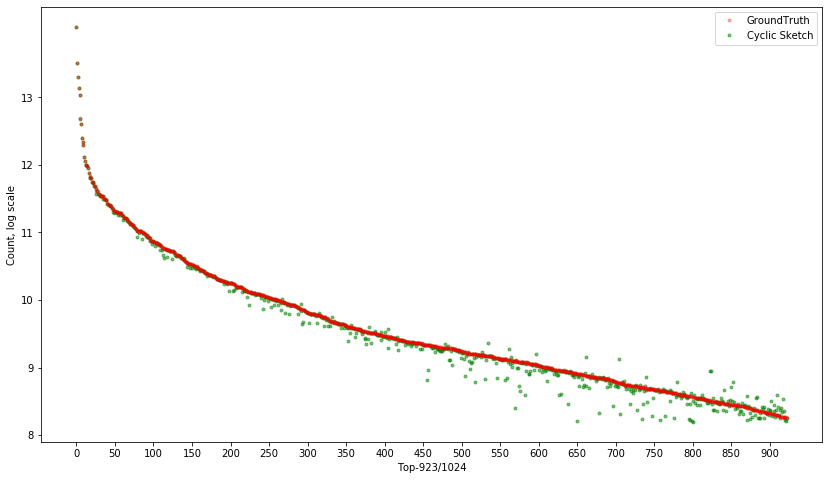

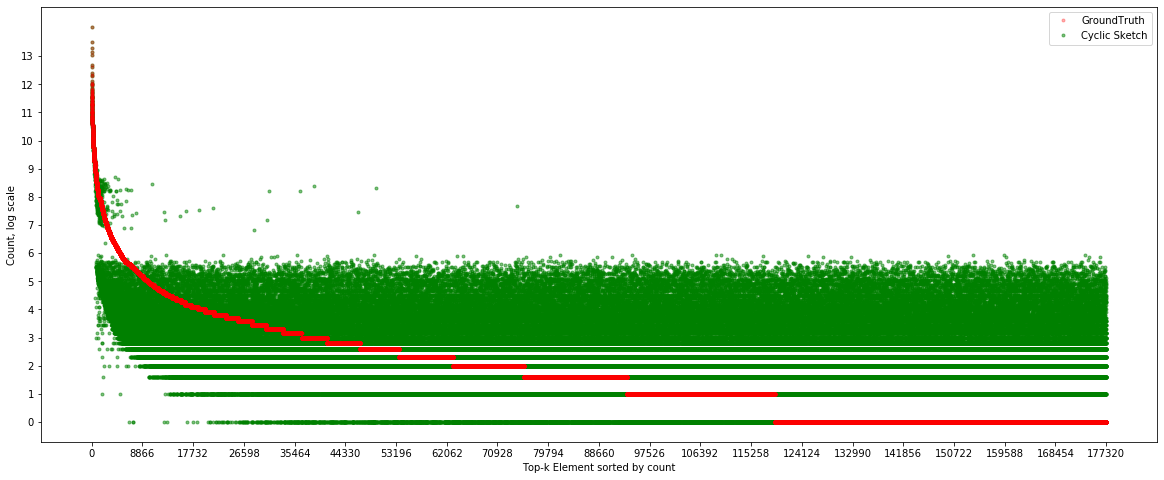

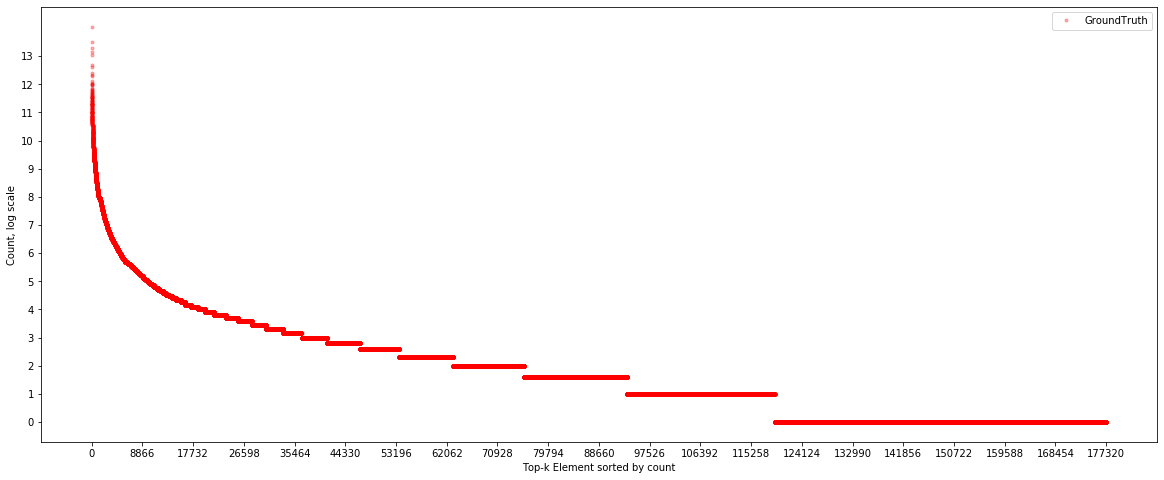

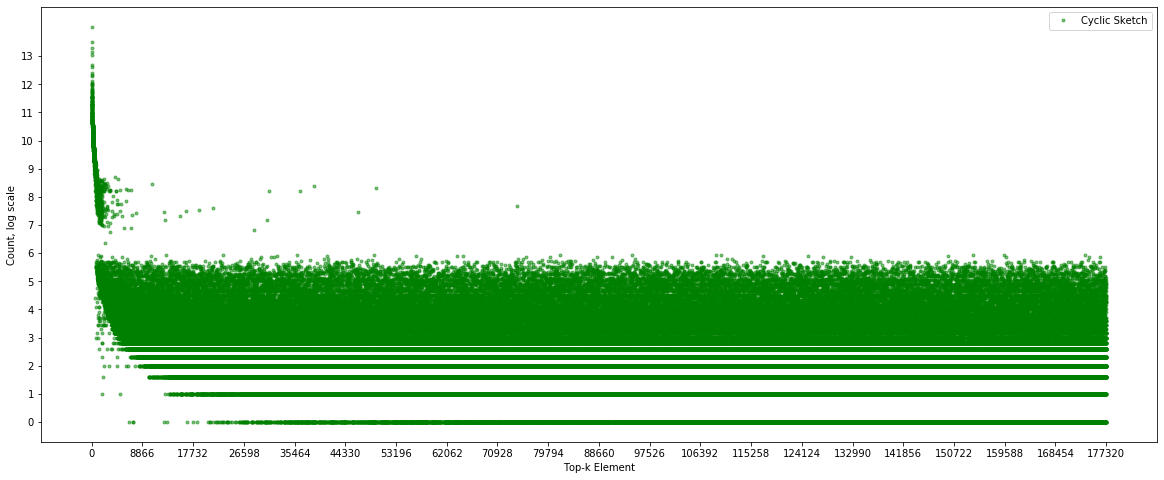

[[LHH: b'A\x8fm|GN\xc6X\xdb1\xec:\x11', keep:19], [LHH: b'\x8ep:\x19T`\xc6X\xdbq\xc2N\x11', keep:38], [LHH: b'h\x9bm,$\xc4J7\xed\x1d\xce\xb7\x11', keep:11], [LHH: b'\xc6X\xda\x88;<\xc6X\xdb0\xa02\x11', keep:61], [LHH: b'G\x00\xe0N\xc4\x87+\xfc\xe1\xeb\x07\x8f\x06', keep:75], [LHH: b'\xcf\x9e\x05b\x06\xd1\x01`\xa7\\\x01\xbb\x06', keep:172], [LHH: b'\x82\x00P\x89\x9e\x1f+\xfc\xe2$\x00P\x06', keep:70], [LHH: b'\xa4\xec\xa3:E\x8ao\xcd\xe4\xa9\x04\xaa\x11', keep:27], [LHH: b'\x99\xc1\xba>\x01\xbb+\xfc\xe0Q\xe9\xce\x06', keep:12], [LHH: b'A}\xa6\x05\xfe\x98h\xc8$v\x01\xbb\x11', keep:5], [LHH: b'\xa5ei\xe5\x00P\x92\tJ\t,\x89\x06', keep:36], [LHH: b'\xc6X\xda\x88.\xf4\xc6X\xdb0>\xae\x11', keep:3], [LHH: b'\xd4\xb3\x90#\xd9\xdb+\xfc\xe0w\x01\xbb\x06', keep:1], [LHH: b'w\xe2C\xb37\xeb\x01`\xa6\xc7\x01\xbb\x06', keep:68], [LHH: b'w\x0f\xda&r[\x01`\xc2\xae\x00P\x06', keep:20], [LHH: b'\xc6X\xdc\xfc\xa2\xc0\xc6X\xdbq9\x9c\x11', keep:78], [LHH: b'\xc6X\xda\x88 J\xc6X\xdb\x14\x89\xfc\x11', keep:73], 

In [2]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re


# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=76
d=256
size=1024
topk=1024
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)    
    

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=str(file.read(13))
            if len(e)<13:
                print('EOF')
                break
            else:
                #item_count-=1
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
print("Top_dict with {} bytes.".format(sys.getsizeof(Top_dict)))
print("Sketch with {} bytes.".format(sys.getsizeof(Sketch)))
sk1=sys.getsizeof(hll.__slots__)
sk2=sys.getsizeof(Sk_head[0].maxID)
sk3=sys.getsizeof(Sk_head[0].keep)
sk_sum=sum([sk2,sk3])*TC.depth
print("Sk_head with {} bytes.".format(sk_sum))
print("Total size {} bytes, ".format(sys.getsizeof(Top_dict)+sys.getsizeof(Sketch)+sk_sum+sk1))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))

## webdocs

EOF
Top-1024,Sketch:64*369
Execution time: 119.360 seconds.
Precision:  0.951
Top_dict with 36968 bytes.
Sketch with 94576 bytes.
Sk_head with 5120 bytes.
Total size 136744 bytes, 
Find:974
Top_ARE: 0.0049
Top_AAE: 20.0739
Estimate time:  0.511 seconds.


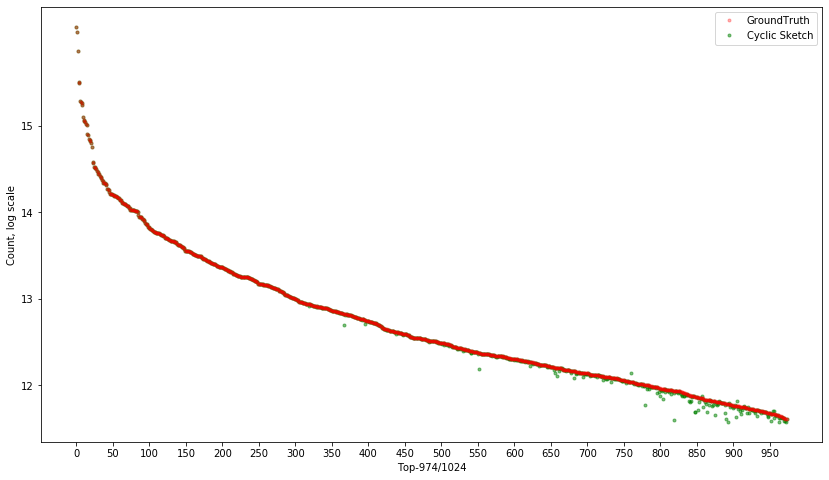

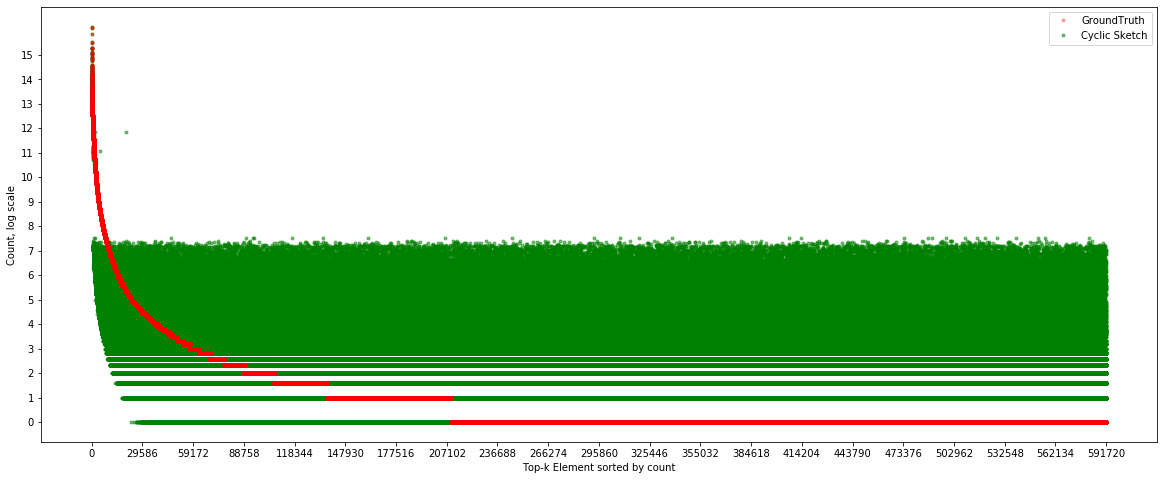

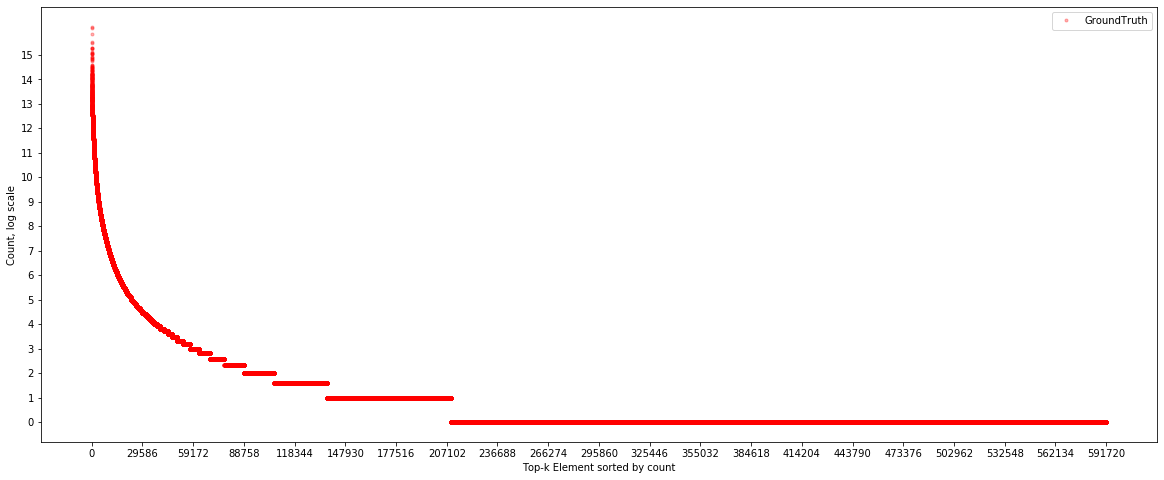

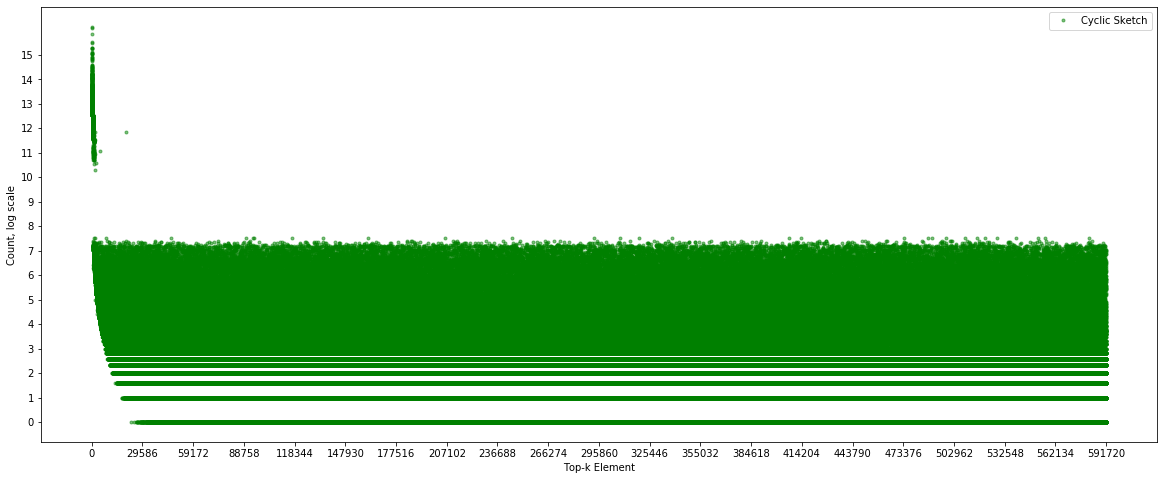

[[LHH: 222, keep:1500], [LHH: 3323, keep:670], [LHH: 6112, keep:1072], [LHH: 806, keep:1064], [LHH: 210, keep:91], [LHH: 1777, keep:1579], [LHH: 143, keep:434], [LHH: 2258, keep:967], [LHH: 1072, keep:1075], [LHH: 1595, keep:75], [LHH: 3305, keep:325], [LHH: 2061, keep:629], [LHH: 268, keep:551], [LHH: 3205, keep:190], [LHH: 463, keep:1472], [LHH: 5483, keep:239], [LHH: 2512, keep:551], [LHH: 3302, keep:461], [LHH: 1079, keep:714], [LHH: 832, keep:1758], [LHH: 2644, keep:570], [LHH: 1127, keep:593], [LHH: 2815, keep:1100], [LHH: 4824, keep:52], [LHH: 849, keep:366], [LHH: 2361, keep:109], [LHH: 2897, keep:269], [LHH: 5222, keep:885], [LHH: 5486, keep:260], [LHH: 2929, keep:185], [LHH: 1179, keep:861], [LHH: 8642, keep:667], [LHH: 2712, keep:988], [LHH: 2716, keep:336], [LHH: 1950, keep:819], [LHH: 1311, keep:424], [LHH: 1015, keep:1042], [LHH: 2652, keep:728], [LHH: 798, keep:1577], [LHH: 727, keep:1364], [LHH: 5278, keep:151], [LHH: 4773, keep:0], [LHH: 5584, keep:504], [LHH: 9701, ke

In [3]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog

import re

# =============================dataset path and file=============================
filepath=r"..\..\dataset\webdocs"
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=369
d=64
size=1024
topk=1024
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:
                #item_count-=1
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
print("Top_dict with {} bytes.".format(sys.getsizeof(Top_dict)))
print("Sketch with {} bytes.".format(sys.getsizeof(Sketch)))
sk1=sys.getsizeof(hll.__slots__)
sk2=sys.getsizeof(Sk_head[0].maxID)
sk3=sys.getsizeof(Sk_head[0].keep)
sk_sum=sum([sk2,sk3])*TC.depth
print("Sk_head with {} bytes.".format(sk_sum))
print("Total size {} bytes, ".format(sys.getsizeof(Top_dict)+sys.getsizeof(Sketch)+sk_sum+sk1))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))
'''


In [82]:
# 在k candidates 中可正確識別的heavy hitter個數
from math import e

d=64
k=64
N_of_k=d*(1-pow(1-1/d,k))
print(N_of_k)
print(N_of_k/k)

# k candidates 中平均可正確識別的heavy hitter%數
print(N_of_k*(d/k))

40.640862448389925
0.6350134757560926
40.640862448389925


In [ ]:
# F2 estimation
import sys
import pandas as pd


# ground truth
# =============================dataset path and file=============================
filepath=r"..\..\dataset\webdocs"
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path
    
grtruth=pd.read_csv(gr_path)
    # DF of ground truth of whole data set
grtruth['Element'] = grtruth['Element'].astype(str)
grtruth
F2grth=0
F2est=0
F2diff=0
for index in len(grtruth):
    F2grth+=pow(grtruth.iloc[index,1],2)
    F2est=TF.Query8(grtruth.iloc[0,0],Top_dict,Sk_head,Sketch,distinct)
    F2diff+=abs(F2grth,F2est)
print(F2diff)

In [ ]:
F2=0
F2est=0
for index in range(len(grtruth)):
    F2+=pow(grtruth.iloc[index,1],2)
    F2est+=pow(TF.Query8(grtruth.iloc[index,0],Top_dict,Sk_head,Sketch,distinct),2)
print(F2,F2est,abs(F2-F2est)/len(grtruth))

In [ ]:
from platform import python_version

print(python_version())

In [51]:
# Python的字典記憶體使用變化
import sys
from pympler import asizeof

my_dict = {}
print("Size with {} keys:\t {}".format(0, sys.getsizeof(my_dict)))
size=0
for i in range(100000):
    my_dict[i] = ''
    if sys.getsizeof(my_dict)!=size:
        size=sys.getsizeof(my_dict)
        print("Size with {} keys:\t {}".format(i+1, sys.getsizeof(my_dict)))

print(asizeof.asizeof(my_dict))
#print(asizeof.asized(my_dict, detail=1).format())       

Size with 0 keys:	 240
Size with 1 keys:	 240
Size with 6 keys:	 368
Size with 11 keys:	 648
Size with 22 keys:	 1184
Size with 43 keys:	 2280
Size with 86 keys:	 4704
Size with 171 keys:	 9320
Size with 342 keys:	 18528
Size with 683 keys:	 36968
Size with 1366 keys:	 73824
Size with 2731 keys:	 147560
Size with 5462 keys:	 295008
Size with 10923 keys:	 589928
Size with 21846 keys:	 1310816
Size with 43691 keys:	 2621544
Size with 87382 keys:	 5242976
8443024


In [88]:
# Python的字典記憶體使用變化
import sys
from pympler import asizeof

my_dict = {}
print("Size with {} keys:\t {}".format(0, sys.getsizeof(my_dict)))
size=0
for i in range(4000):
    my_dict[i] = ''
print(asizeof.asizeof(my_dict))

#print(asizeof.asized(my_dict, detail=1).format())      

Size with 0 keys:	 240
275608
